In [1]:
import numpy as np
import nibabel as nib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [50]:
def load_nifti_image(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

def signal_intensity_function(TR, M0, T1):
    return M0 * (1 - np.exp(-TR / T1))

In [51]:
# Example usage:
# Load MRI images
image_paths = ['15 T1_se_mapping_TR250.nii', '16 T1_se_mapping_TR500.nii', '17 T1_se_mapping_TR1000.nii']
images = [load_nifti_image(path) for path in image_paths]

# Define TR values (in milliseconds)
TR_values = [250, 500, 1000]

In [52]:
print(images[0].shape)

(256, 64, 1)


[ 31.  80. 161.]
Printing Popt:  [90.66721655  1.        ]


NameError: name 'T1_estimated' is not defined

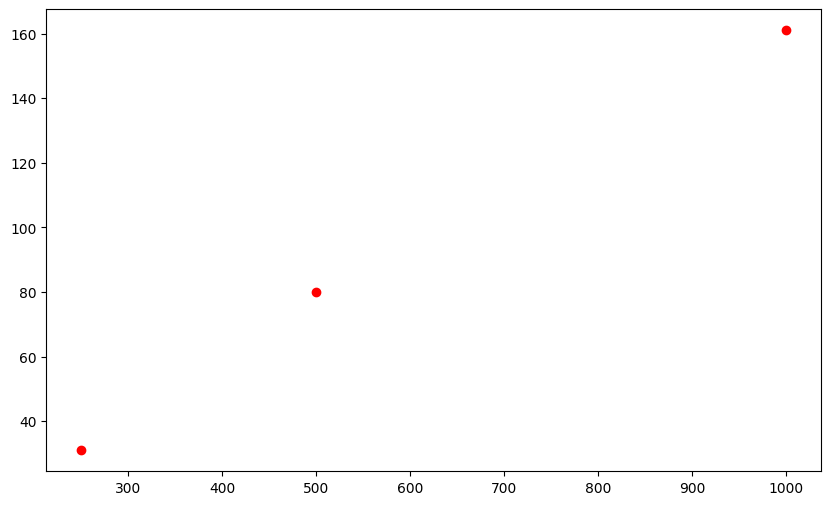

In [55]:
def calculate_T1_map(images, TR_values):
    # Initialize T1 map with zeros
    T1_map = np.zeros(images[0].shape)
    S0_map = np.zeros(images[0].shape)
    
    # Vectorize the TR values
    TR_values = np.array(TR_values)
    
    # Iterate over each voxel in the single slice
    for i in range(images[0].shape[0]):
        for j in range(images[0].shape[1]):
            # Get the signal intensities for this voxel
            signal_intensities = np.array([img[128, 25] for img in images]).flatten()
            print(signal_intensities)
            
            # Fit the signal intensity data to the exponential model
            try:
                popt, _ = curve_fit(signal_intensity_function, TR_values, signal_intensities, bounds=(0, np.inf))
                print("Printing Popt: ", popt)
                S0, T1 = popt
            except RuntimeError:
                S0, T1 = 0, 0

            T1_map[i, j] = T1
            TR_values_for_plot = np.linspace(min(TR_values), max(TR_values), 100)
            fitted_signals = signal_intensity_function(TR_values_for_plot, *popt)
            plt.figure(figsize=(10, 6))
            plt.scatter(TR_values, signal_intensities, color='red', label='Experimental data')
            plt.plot(TR_values_for_plot, fitted_signals, label=f'Fitted Curve (T1={T1_estimated:.2f} ms)')
            plt.title('T1 Relaxation Curve Fitting')
            plt.xlabel('TR (ms)')
            plt.ylabel('Signal Intensity')
            plt.legend()
            plt.show()
            break
        break
    
    return T1_map

# Calculate T1 map
T1_map = calculate_T1_map(images, TR_values)

(256, 64, 1)


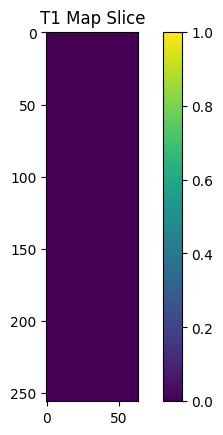

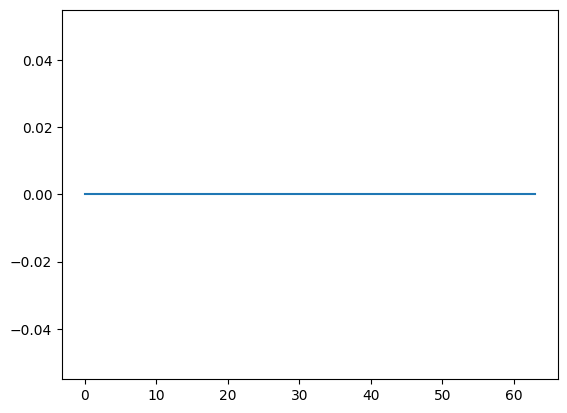

In [49]:
# Visualize a slice of the T1 map
print(T1_map.shape)
plt.imshow(T1_map[:, :, 0])
plt.colorbar()
plt.title('T1 Map Slice')
plt.show()

plt.plot(T1_map[129,0:64,0])
plt.show()